In [ ]:
!pip -q install rpy2

In [ ]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
#utils.chooseCRANmirror(ind=1) # select the first mirror in the list

In [ ]:
# R package names
packnames = ('ggplot2', 'hexbin', 'hawkes')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

# Load the base R environment and the hawkes package
base = importr('base')
hawkes = importr('hawkes')

# Use the R function from the hawkes package
simulate_hawkes = ro.r('simulateHawkes')


In [ ]:
import pandas as pd

In [36]:
import numpy as np
import rpy2.robjects.numpy2ri

# Activate automatic conversion between numpy and R objects
rpy2.robjects.numpy2ri.activate()

# Parameters for the Hawkes process
lambda0 = np.array([0.6, 0, 0])  # Baseline intensity for 2D process
alpha = np.array([[0, 0, 0], # Excitation matrix
                  [0.9, 0, 0],
                  [0.9, 0, 0]])
beta = np.array([1.5, 1.5, 1.5])  # Decay parameter

# Simulate a Hawkes process
T_max = 1000.0  # Time horizon
hawkes_simulation = simulate_hawkes(lambda0, alpha, beta, T_max)

# Extract the simulated events (list of event times for each dimension)
events = hawkes_simulation
#print(f'Simulated events: {events}')

# convert ListVector to Pandas dataframe
df = pd.DataFrame(events)

#filter until a row has NaNs:
#df = df[:, 600]
df

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
0,4.558553,5.497598,7.546720,7.999169,8.909745,9.389590,9.948541,11.397706,12.446528,12.737888,...,976.119951,979.928943,980.166528,984.205776,989.758968,994.04043,994.781698,995.593467,999.242802,999.49605
1,5.123977,5.926751,8.017461,9.585052,11.376419,11.656979,12.766762,14.981932,16.149075,23.902888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.032988,5.534517,8.007285,9.747901,10.559384,12.442873,13.065786,15.540712,15.545484,24.867921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# print number non NaN columns on each row:
df.count(axis=1)

,0
0,614
1,328
2,396


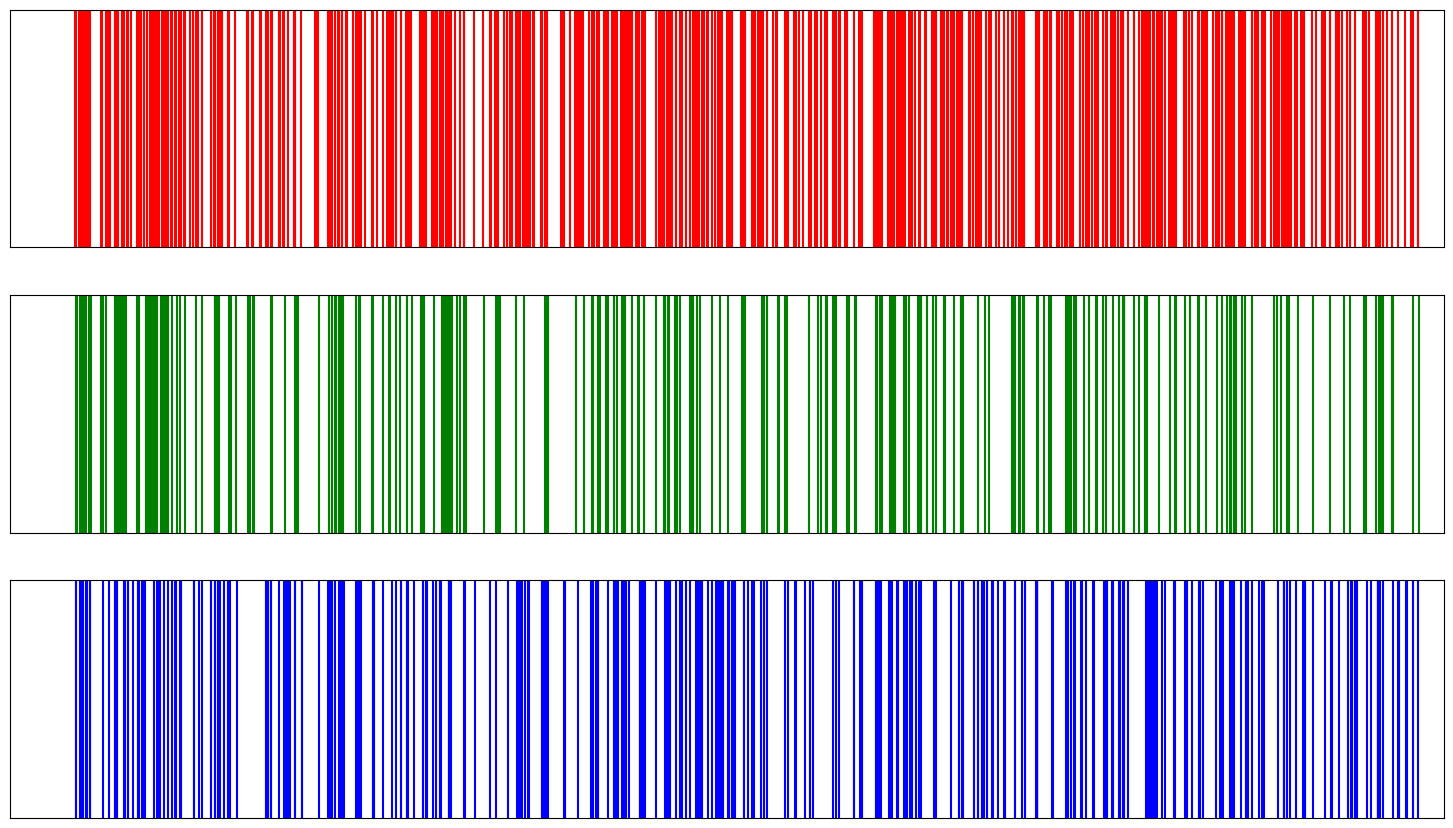

In [38]:
import matplotlib.pyplot as plt

def _plot_tick_bars(timestamps_i, ax, color):
    for t in timestamps_i:
        ax.axvline(x=t, color = color)
    # ax.set_title(label, fontsize=20)
    # set figsize:
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
def _plot_tick_bars_causes(timestamps_i, ax, cause):
    colors = ['red', 'green', 'blue']
    for idx, t in enumerate(timestamps_i):
        cause_ = torch.argmax(cause[idx]).item()
        ax.axvline(x=t, color = colors[cause_])
    ax.get_yaxis().set_visible(False)

fig, ax = plt.subplots(nrows = 3, sharex = True)

_plot_tick_bars(df.loc[0].dropna(), ax[0], color = 'red')
_plot_tick_bars(df.loc[1].dropna(), ax[1], color = 'green')
_plot_tick_bars(df.loc[2].dropna(), ax[2], color = 'blue')

In [39]:
import pickle
ckpt = (alpha, df)
with open('hawkes_ckpt.pkl', 'wb') as f:
    pickle.dump(ckpt, f)